In [1]:
import pandas as pd

In [3]:
data=pd.read_csv(r"D:\Python\Data Science Project\DimondPricePrediction\notebooks\data\train.csv")

### Introduction About the Data :

**The dataset** The goal is to predict `price` of given diamond (Regression Analysis).

There are 10 independent variables (including `id`):

* `id` : unique identifier of each diamond
* `carat` : Carat (ct.) refers to the unique unit of weight measurement used exclusively to weigh gemstones and diamonds.
* `cut` : Quality of Diamond Cut
* `color` : Color of Diamond
* `clarity` : Diamond clarity is a measure of the purity and rarity of the stone, graded by the visibility of these characteristics under 10-power magnification.
* `depth` : The depth of diamond is its height (in millimeters) measured from the culet (bottom tip) to the table (flat, top surface)
* `table` : A diamond's table is the facet which can be seen when the stone is viewed face up.
* `x` : Diamond X dimension
* `y` : Diamond Y dimension
* `x` : Diamond Z dimension

Target variable:
* `price`: Price of the given Diamond.

Dataset Source Link :
[https://www.kaggle.com/competitions/playground-series-s3e8/data?select=train.csv](https://www.kaggle.com/competitions/playground-series-s3e8/data?select=train.csv)

In [4]:
data.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [6]:
data.tail()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
193568,193568,0.31,Ideal,D,VVS2,61.1,56.0,4.35,4.39,2.67,1130
193569,193569,0.70,Premium,G,VVS2,60.3,58.0,5.75,5.77,3.47,2874
193570,193570,0.73,Very Good,F,SI1,63.1,57.0,5.72,5.75,3.62,3036
193571,193571,0.34,Very Good,D,SI1,62.9,55.0,4.45,4.49,2.81,681
193572,193572,0.71,Good,E,SI2,60.8,64.0,5.73,5.71,3.48,2258


In [7]:
data.sample(5)

,id,carat,cut,color,clarity,depth,table,x,y,z,price
79486,79486,0.52,Ideal,G,IF,61.8,56.0,5.14,5.17,3.19,2211
84357,84357,0.32,Very Good,G,VVS2,61.7,57.0,4.37,4.39,2.70,620
76948,76948,0.31,Ideal,H,SI1,62.1,53.7,4.37,4.40,2.72,466
75689,75689,2.01,Very Good,H,SI1,63.5,56.0,7.96,8.05,5.06,17392
110052,110052,0.32,Ideal,D,VS2,62.1,55.0,4.38,4.41,2.73,761


In [8]:
data.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [10]:
data.duplicated().sum()

0

In [11]:
data.shape

(193573, 11)

Sagrigate categorical and Numerical features

In [12]:
carcategorical_columns=data.columns[data.dtypes=="object"]

In [13]:
numerical_columns=data.columns[data.dtypes!="object"]

In [14]:
data[carcategorical_columns].describe()

,cut,color,clarity
count,193573,193573,193573
unique,5,7,8
top,Ideal,G,SI1
freq,92454,44391,53272


In [20]:
data[carcategorical_columns]["cut"].value_counts()

cut
Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: count, dtype: int64

In [21]:
data[carcategorical_columns]["color"].value_counts()

color
G    44391
E    35869
F    34258
H    30799
D    24286
I    17514
J     6456
Name: count, dtype: int64

In [22]:
data[carcategorical_columns]["clarity"].value_counts()

clarity
SI1     53272
VS2     48027
VS1     30669
SI2     30484
VVS2    15762
VVS1    10628
IF       4219
I1        512
Name: count, dtype: int64

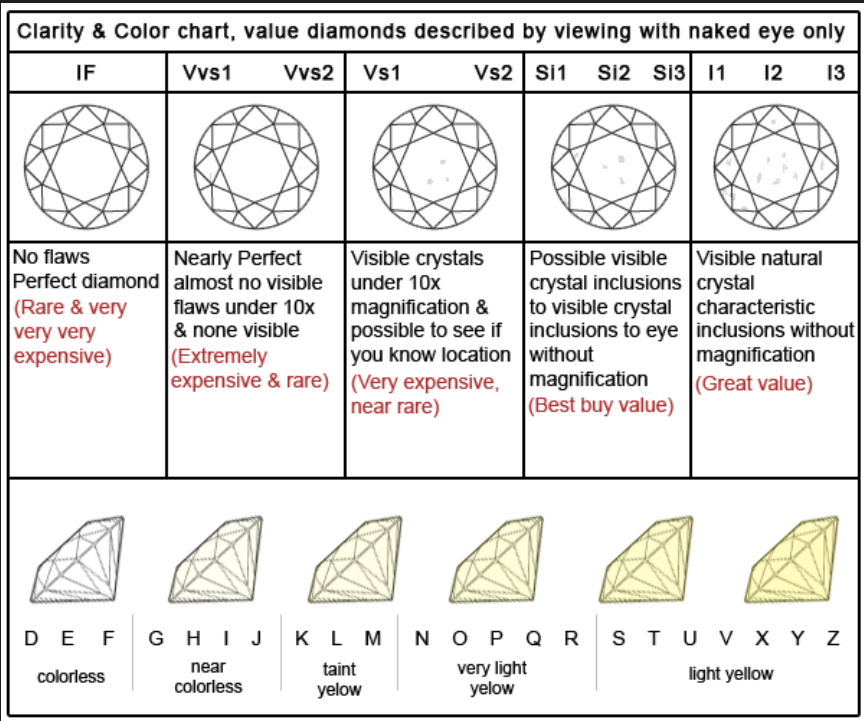

In [18]:
data[numerical_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
id,193573.0,96786.000000,55879.856166,0.0,48393.00,96786.00,145179.00,193572.00
carat,193573.0,0.790688,0.462688,0.2,0.40,0.70,1.03,3.50
depth,193573.0,61.820574,1.081704,52.1,61.30,61.90,62.40,71.60
table,193573.0,57.227675,1.918844,49.0,56.00,57.00,58.00,79.00
x,193573.0,5.715312,1.109422,0.0,4.70,5.70,6.51,9.65
y,193573.0,5.720094,1.102333,0.0,4.71,5.72,6.51,10.01
z,193573.0,3.534246,0.688922,0.0,2.90,3.53,4.03,31.30
price,193573.0,3969.155414,4034.374138,326.0,951.00,2401.00,5408.00,18818.00


In [16]:
data[carcategorical_columns]

,cut,color,clarity
0,Premium,F,VS2
1,Very Good,J,SI2
2,Ideal,G,VS1
3,Ideal,G,VS1
4,Premium,G,VS2
...,...,...,...
193568,Ideal,D,VVS2
193569,Premium,G,VVS2
193570,Very Good,F,SI1
193571,Very Good,D,SI1


In [17]:
data[numerical_columns]

,id,carat,depth,table,x,y,z,price
0,0,1.52,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,62.6,59.0,7.65,7.61,4.77,14453
...,...,...,...,...,...,...,...,...
193568,193568,0.31,61.1,56.0,4.35,4.39,2.67,1130
193569,193569,0.70,60.3,58.0,5.75,5.77,3.47,2874
193570,193570,0.73,63.1,57.0,5.72,5.75,3.62,3036
193571,193571,0.34,62.9,55.0,4.45,4.49,2.81,681


https://www.vrai.com/journal/post/diamond-cut